In [1]:
pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.6-cp313-cp313-win_amd64.whl.metadata (169 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached matplotlib-3.10.0-c

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")


In [5]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows
print("Customers Dataset")
display(customers.head())
print("\nProducts Dataset")
display(products.head())
print("\nTransactions Dataset")
display(transactions.head())


Customers Dataset


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
# Check for missing values
print("Missing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Check for duplicates
print("\nDuplicates:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates:
Customers: 0
Products: 0
Transactions: 0


In [7]:
# Merge datasets
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display merged data
print("Merged Dataset")
display(merged.head())


Merged Dataset


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [18]:
# Summary statistics
print("Summary Statistics:")
display(merged.describe())


Summary Statistics:


,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


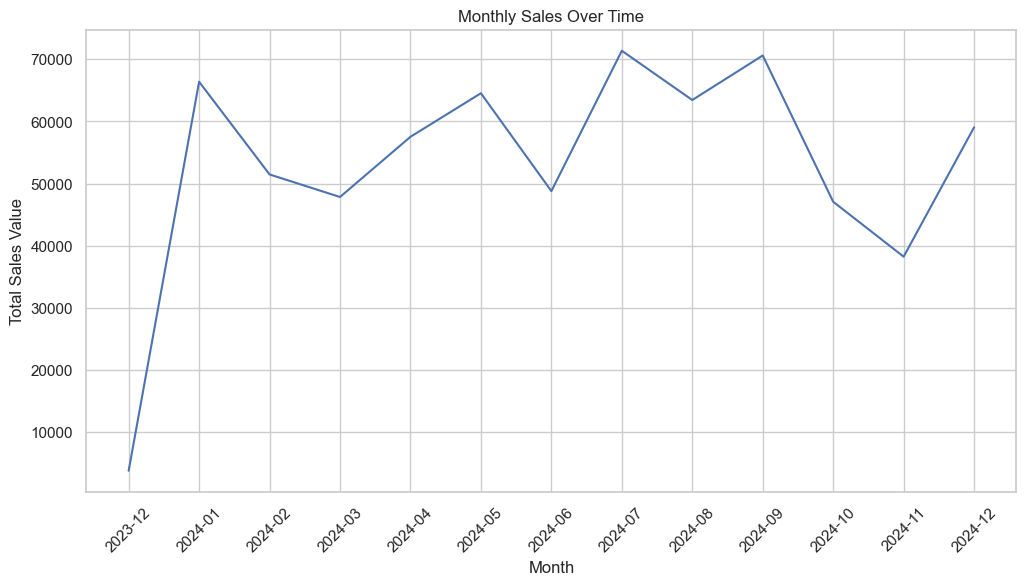

In [10]:
# Plot transaction values over time
merged['YearMonth'] = merged['TransactionDate'].dt.to_period('M')
monthly_sales = merged.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Convert YearMonth to string for proper labeling
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalValue')
plt.title("Monthly Sales Over Time")
plt.ylabel("Total Sales Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()



C:\Users\anush\AppData\Local\Temp\ipykernel_18284\3155332123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")


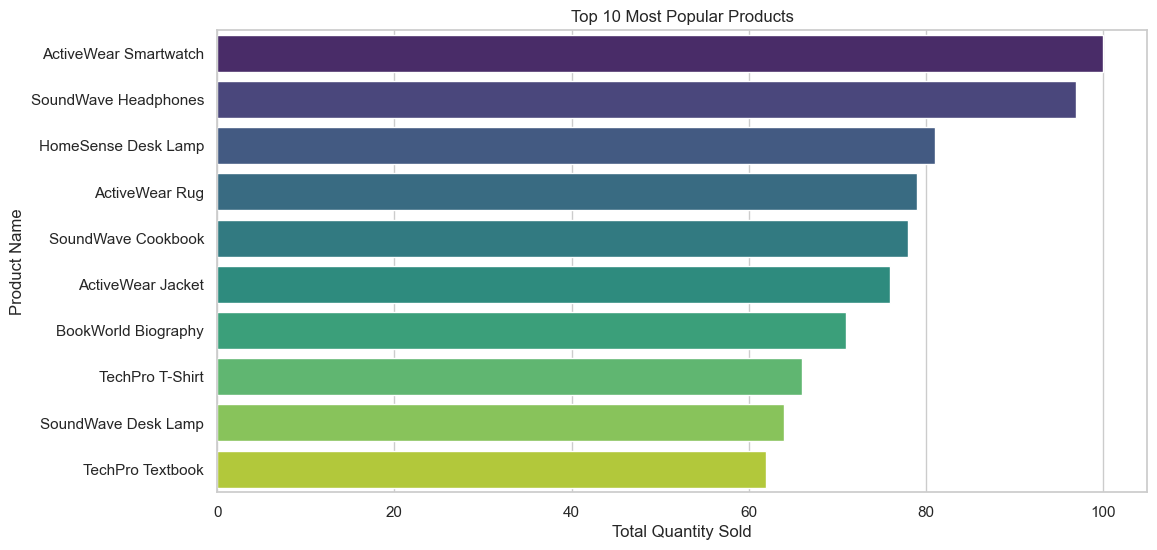

In [11]:
# Top 10 popular products
popular_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="viridis")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


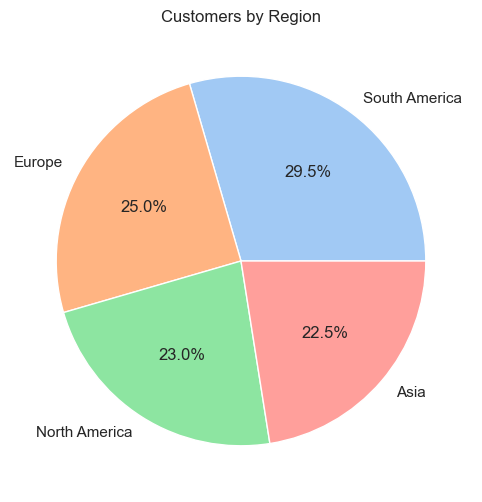

In [12]:
# Customers by region
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Customers by Region")
plt.ylabel("")
plt.show()


C:\Users\anush\AppData\Local\Temp\ipykernel_18284\1282921036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_value_customers.values, y=high_value_customers.index, palette="coolwarm")


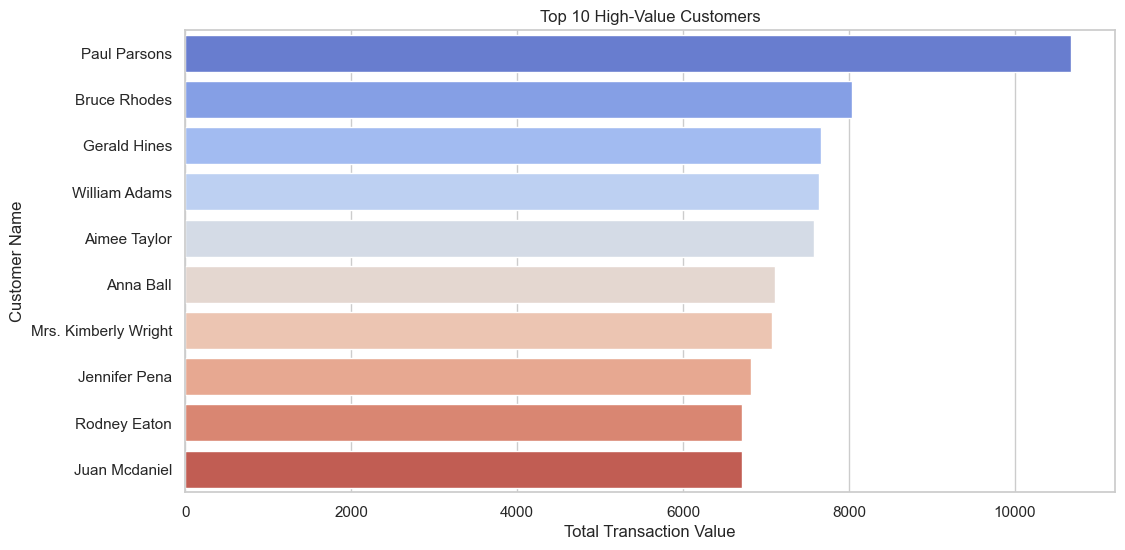

In [13]:
# Top 10 high-value customers
high_value_customers = merged.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=high_value_customers.values, y=high_value_customers.index, palette="coolwarm")
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Transaction Value")
plt.ylabel("Customer Name")
plt.show()


In [14]:
# Save cleaned and merged data
merged.to_csv("Cleaned_Merged_Data.csv", index=False)
